In [22]:
import gzip
import math
import numpy as np
import string
import pandas as pd
import json
import matplotlib.pyplot as plt

In [50]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [51]:
# loading and processing dataset

df = pd.DataFrame(dataset)

# dropping all rows with null values

df = df.dropna()

# converting necessary columns to numeric format

df['weight'] = pd.to_numeric(df['weight'].str.split('lbs').str[0])
df['age'] = pd.to_numeric(df['age'])
df['rating'] = pd.to_numeric(df['rating'])
df['size'] = pd.to_numeric(df['size'])

height_feet = pd.to_numeric(df['height'].str.split("'").str[0])
ser = df['height'].str.split().str[1]
height_inches = pd.to_numeric(ser.str.split('"').str[0])
df['height'] = (height_feet*12) + height_inches

# drop user id, review date

df = df.drop(columns = ['review_date'])

In [52]:
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,420272,34d,2260466,137,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68,14,28
1,fit,273551,34b,153475,132,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66,12,36
3,fit,909926,34c,126335,135,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65,8,34
4,fit,151944,34b,616682,145,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69,12,27
5,fit,734848,32b,364092,138,8,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69,8,42
192540,fit,118398,32c,682043,100,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61,4,29
192541,fit,47002,36a,683251,135,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68,8,31
192542,fit,961120,36c,126335,165,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66,16,31


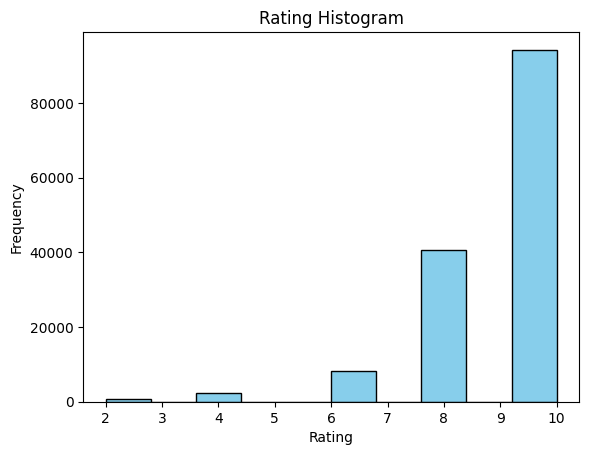

In [26]:
plt.hist(df['rating'], color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram')
plt.show()

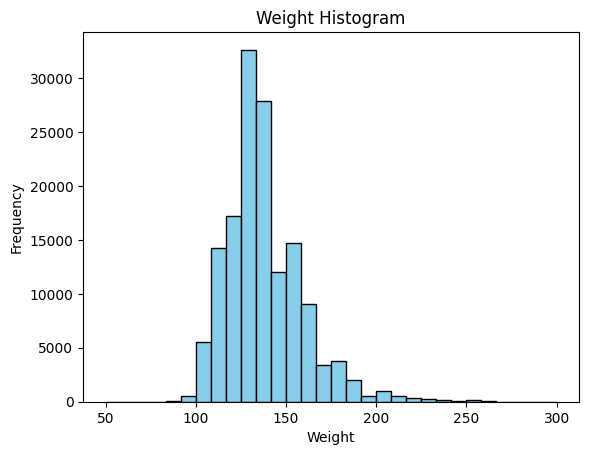

In [27]:
plt.hist(df['weight'], bins = 30, color='skyblue', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Histogram')
plt.show()

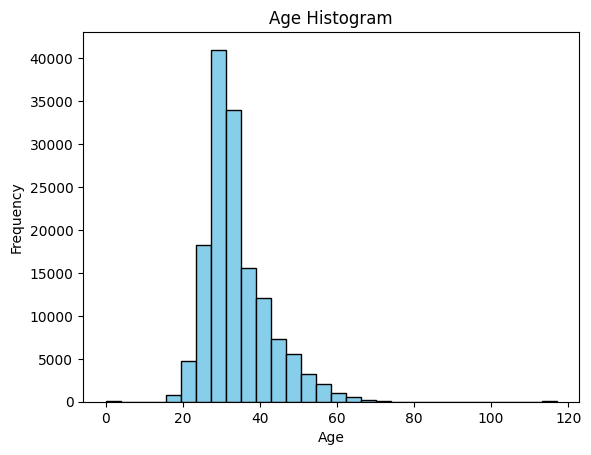

In [28]:
plt.hist(df['age'], bins = 30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

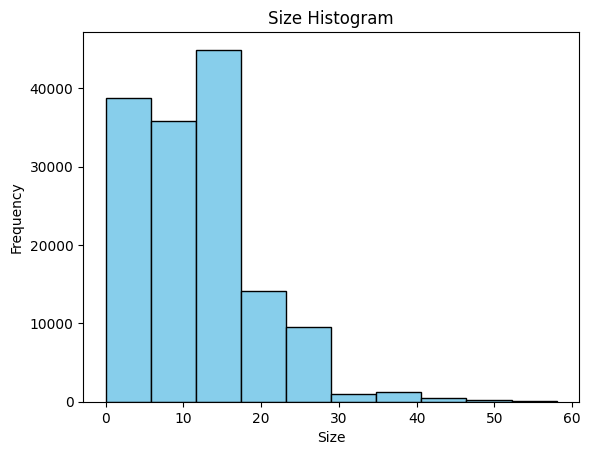

In [49]:
plt.hist(df['size'], color='skyblue', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Size Histogram')
plt.show()

(array([ 1029.,     0.,     0.,     0., 78105., 65859.,     0.,     0.,
            0.,  1388.]),
 array([4.06, 4.26, 4.46, 4.66, 4.86, 5.06, 5.26, 5.46, 5.66, 5.86, 6.06]),
 <BarContainer object of 10 artists>)

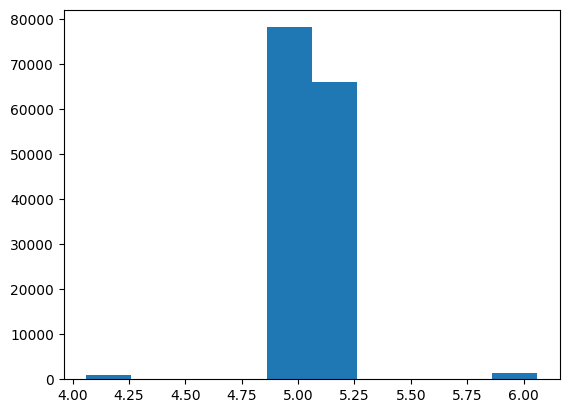

In [33]:
plt.hist(df['height'])

In [34]:
# percentage of data reported as fit

print("Percentage of items reported as fit: " + str(df[df['fit'] == 'fit'].shape[0] / df.shape[0]))
print("Percentage of items reported as small: " + str(df[df['fit'] == 'small'].shape[0] / df.shape[0]))
print("Percentage of items reported as large: " + str(df[df['fit'] == 'large'].shape[0] / df.shape[0]))

Percentage of items reported as fit: 0.7359766636380405
Percentage of items reported as small: 0.1340474515135161
Percentage of items reported as large: 0.12997588484844344


In [35]:
df['fit'].unique()

array(['fit', 'small', 'large'], dtype=object)

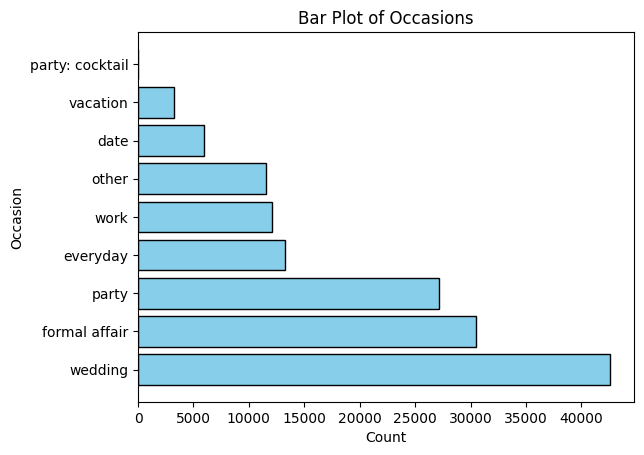

In [36]:
category_counts = df['rented for'].value_counts()

# Plot horizontal bar plot
plt.barh(category_counts.index, category_counts.values, color = 'skyblue', edgecolor = 'black')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Occasion')
plt.title('Bar Plot of Occasions')

# Show the plot
plt.show()

In [37]:
category_counts[:20]

rented for
wedding            42622
formal affair      30496
party              27198
everyday           13263
work               12124
other              11510
date                5929
vacation            3238
party: cocktail        1
Name: count, dtype: int64

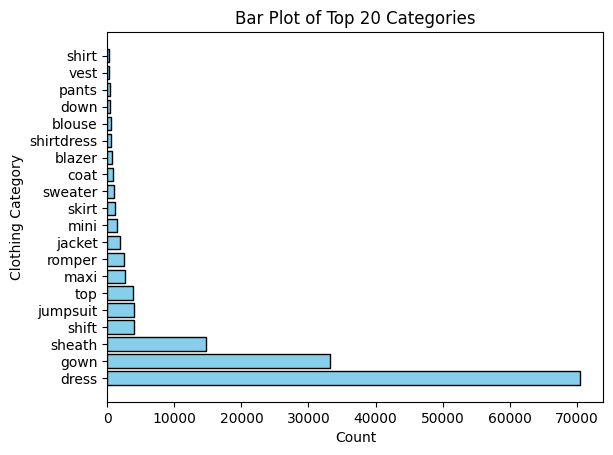

In [38]:
category_counts = df['category'].value_counts()[:20]

#plt.figure(figsize=(13, 13))

plt.barh(category_counts.index, category_counts.values, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Count')
plt.ylabel('Clothing Category')
plt.title('Bar Plot of Top 20 Categories')

plt.show()

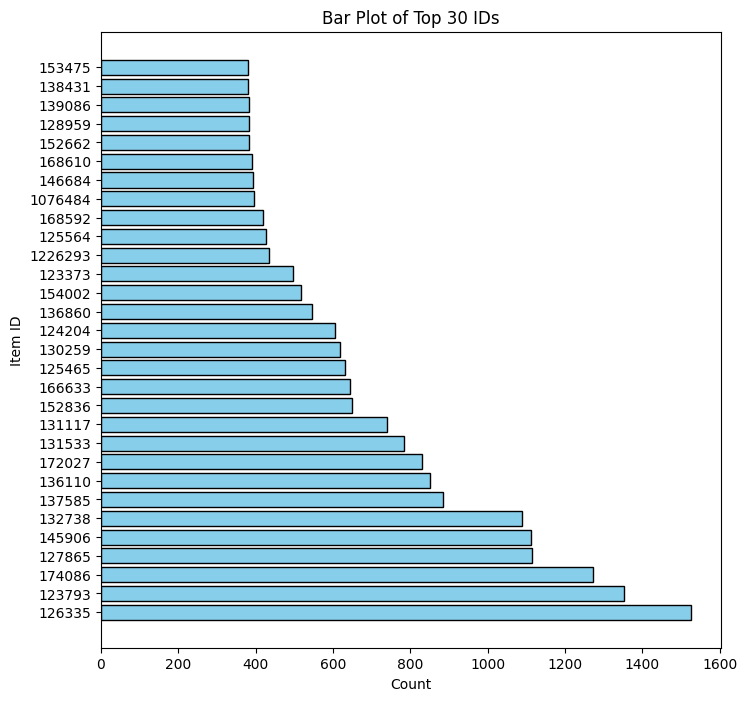

In [39]:
category_counts = df['item_id'].value_counts()[:30]

plt.figure(figsize=(8, 8))

plt.barh(category_counts.index, category_counts.values, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Count')
plt.ylabel('Item ID')
plt.title('Bar Plot of Top 30 IDs')

plt.show()

In [40]:
df[df['item_id'] == '126335']

,fit,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
3,fit,34c,126335,135,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,5.05,8,34
72,large,34d,126335,128,10,formal affair,"I normally wear a 4, but ended up wearing the ...",full bust,"The dress was fun, comfortable and pretty.",dress,5.08,4,48
208,large,34b,126335,140,10,wedding,My back-up size for the original dress that I ...,pear,Wish I had somewhere else to go....,dress,5.02,12,38
291,large,34b,126335,145,6,wedding,Dress was more pinkish than the picture. I wo...,athletic,RTR is very easy to rent and send back.There i...,dress,5.04,12,40
464,small,36c,126335,190,6,formal affair,"Overall, I loved this dress and I thought it f...",hourglass,A glitzy showstopper that made me stand out at...,dress,5.10,28,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191950,large,34b,126335,130,6,formal affair,"Runs big, just like the rest of the comments s...",hourglass,Got a ton of compliments on this gorgeous & cl...,dress,5.04,4,25
192014,fit,34b,126335,155,8,party,I wore this to my office holiday party and eve...,pear,So sparkly! Perfect for a holiday or NYE party.,dress,5.11,12,33
192338,fit,38d+,126335,217,10,formal affair,I absolutely loved this dress! I received comp...,apple,I was aiming for a vintage movie star look for...,dress,5.04,51,31
192499,large,32c,126335,125,10,wedding,This dress was beautiful!! Wore it to a cockta...,athletic,"Gorgeous dress!! 1st experience with RTR, but ...",dress,5.04,4,39


In [41]:
df['bust size'].unique()

array(['34d', '34b', '34c', '32b', '34d+', '36a', '36d', '32d+', '32c',
       '30dd', '36b', '36c', '32d', '34a', '34dd', '32a', '34ddd/e',
       '38d+', '38a', '38b', '38d', '36ddd/e', '38dd', '38f', '42dd',
       '40dd', '32dd', '38c', '30ddd/e', '32ddd/e', '36dd', '36d+', '40d',
       '28dd', '42c', '30d', '30b', '34aa', '32aa', '36f', '28c', '36aa',
       '34g', '42ddd/e', '40c', '34f', '28g', '28aa', '36g', '28f',
       '44ddd/e', '42d', '40ddd/e', '30c', '30aa', '44dd', '32i', '32g',
       '30g', '30h', '30a', '34j', '38ddd/e', '32h', '28a', '32f', '44d',
       '40h', '38g', '40g', '28b', '34h', '36j', '36h', '28ddd/e', '44f',
       '34i', '30f', '36i', '30i', '28h', '42b', '42j', '40f', '38aa',
       '38i', '48dd', '28d', '46ddd/e', '42g', '48d', '38h', '40b', '40j',
       '32j', '38j', '44b', '44c', '44g', '42f', '44h'], dtype=object)

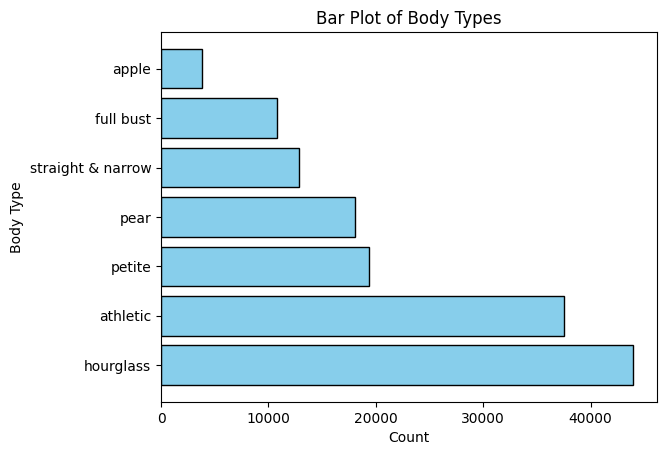

In [47]:
category_counts = df['body type'].value_counts()

plt.barh(category_counts.index, category_counts.values, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Count')
plt.ylabel('Body Type')
plt.title('Bar Plot of Body Types')

plt.show()